# Course: Data Analysis

# Topic 5: Cluster Analysis

* [1. Hierarchical cluster analysis](#chapter1)
    * [Example 1.1. Beer](#section_1_1)
    * [Example 1.2. Candidates Assesment](#section_1_2)
* [2. k-means cluster analysis](#chapter2)
    * [Example 2.1. Synthetic data](#section_2_1)
    * [Example 2.2. YouTube](#section_2_2)
* [3. DBSCAN](#chapter3)
    * [Example 3.1. Synthetic data](#section_3_1)
    * [Example 3.2. Mall Customer Segmentation Data](#section_3_2)

In [1]:
pip install yellowbrick

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
%matplotlib inline
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, DBSCAN
import warnings
warnings.filterwarnings("ignore")

## 1. Hierarchical cluster analysis <a class="anchor" id="chapter1"></a>

### Example 1.1. Beer <a id="section_1_1"></a>

File `beer.xlsx`


Variables:
- `bier`  - Name of the brand
- `producer` - Name of the producer 
- `costs` - Spending in dollars for capacity equal to 12 ounces
- `calories` - calories for the same amount of beer
- `alcohol` - alcohol content in percent

In [4]:
df1 = pd.read_excel('beer.xlsx')
df1

bier producer  costs  calories  alcohol
0            Budweiser      USA   0.43       144      4.7
1            Lowenbrau      USA   0.48       157      4.9
2             Michelob      USA   0.50       162      5.0
3          Kronenbourg   France   0.73       170      5.2
4             Heineken  Holland   0.77       152      5.0
5             Schmidts      USA   0.30       147      4.7
6    Pabst Blue Ribbon      USA   0.38       152      4.9
7         Miller Light      USA   0.43        99      4.3
8      Budweiser Light      USA   0.44       113      3.7
9          Coors Light      USA   0.46       102      4.1
10           Dos Equis   Mexico   0.70       145      4.5
11               Becks  Germany   0.76       150      4.7
12        Rolling Rock      USA   0.36       144      4.7
13   Pabst Extra Light      USA   0.38        68      2.3
14              Tuborg      USA   0.43       155      5.0
15  Olympia Gold Light      USA   0.46        72      2.9
16       Schlitz Light      USA   0.47        97      4.2

### Preliminary graphical data analysis

<Axes: xlabel='calories', ylabel='costs'>

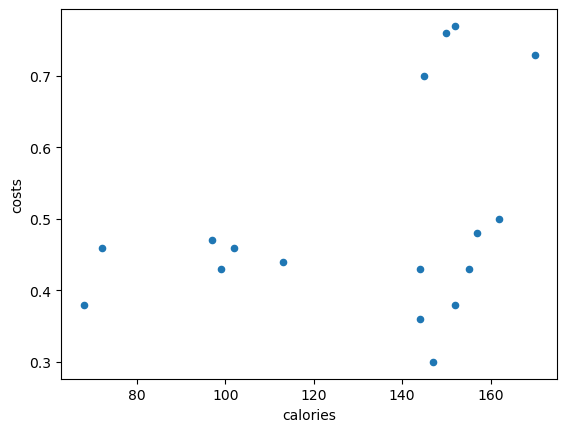

In [5]:
df1.plot('calories', 'costs', kind='scatter')  # could be done if we cluster based on 2 variables

<Axes: xlabel='z_calories', ylabel='z_costs'>

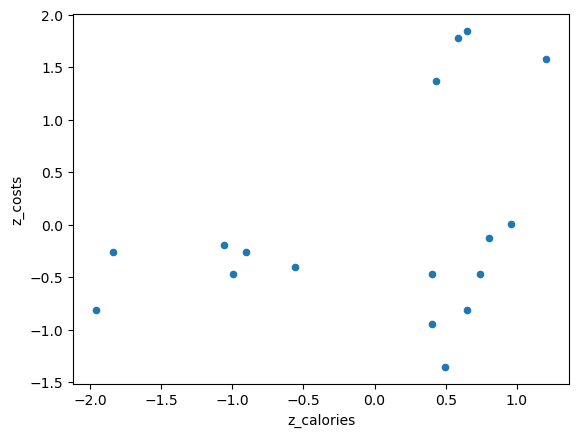

In [6]:
df1['z_calories'] = (df1['calories'] - df1['calories'].mean())/df1['calories'].std()
df1['z_costs'] = (df1['costs'] - df1['costs'].mean())/df1['costs'].std()
df1.plot('z_calories', 'z_costs', kind='scatter')
# we standardize the values of the variables as they are measured in different scales

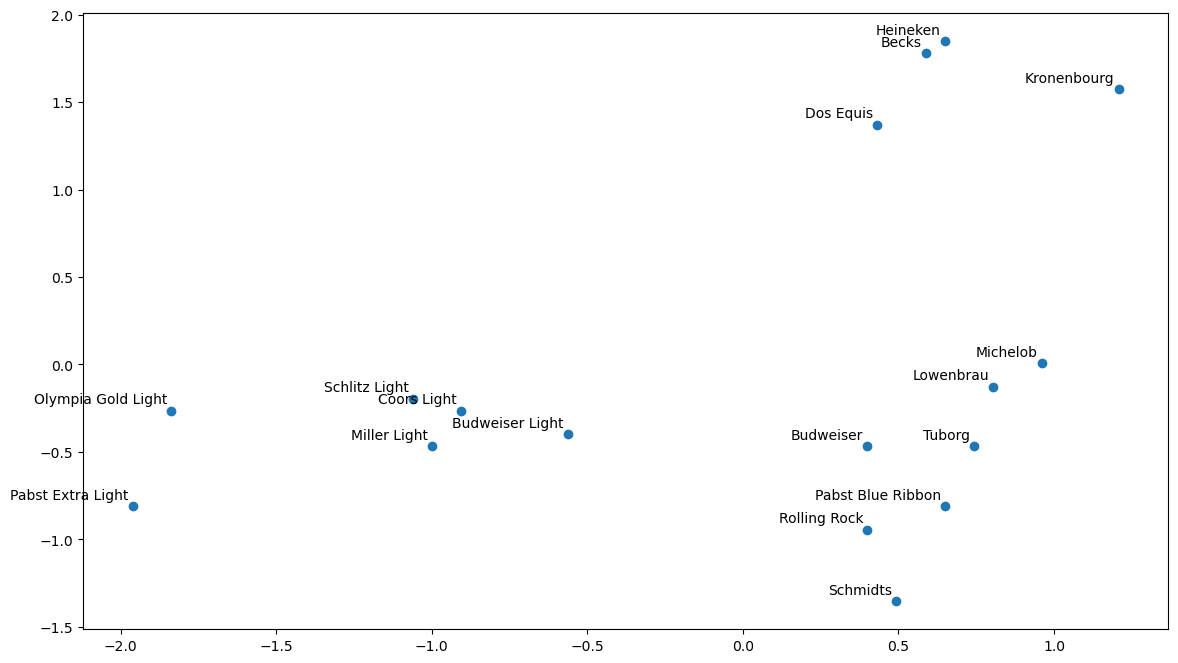

In [7]:
labels = df1['bier']
plt.figure(figsize=(14, 8))
plt.scatter(df1['z_calories'],df1['z_costs'], label='True Position')

for label, x, y in zip(labels, df1['z_calories'], df1['z_costs']):  # add labels with brand names
    plt.annotate(
        label,
        xy=(x, y), xytext=(-3, 3),
        textcoords='offset points', ha='right', va='bottom')

In [8]:
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

[About linkage](https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.linkage.html)

[About fckuster](https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.fcluster.html)

[About dendrogram](https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.dendrogram.html)

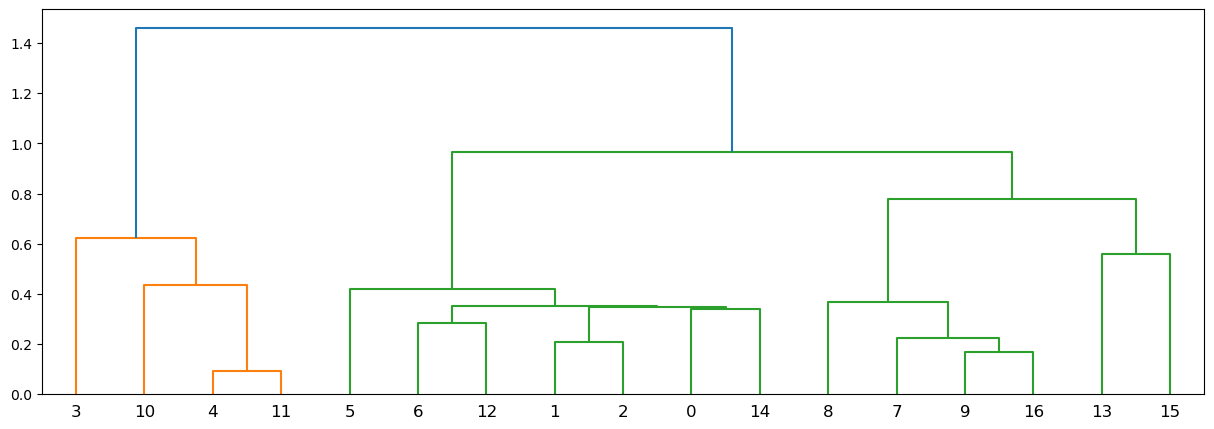

In [9]:
plt.figure(figsize=(15, 5))
dn = dendrogram(linkage(df1[['z_calories', 'z_costs']], 'single'))
# Nearest neighbor / Single-linkage

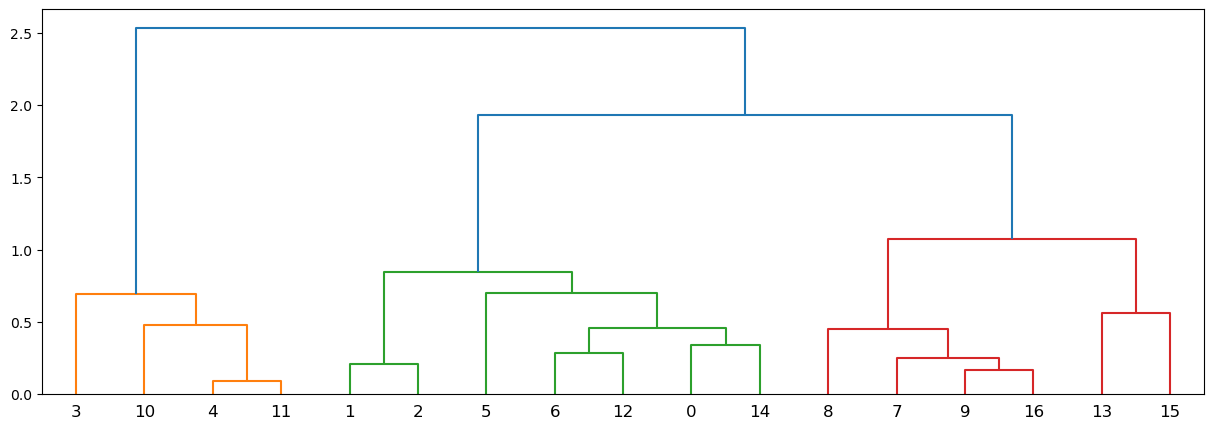

In [10]:
plt.figure(figsize=(15, 5))
dn = dendrogram(linkage(df1[['z_calories', 'z_costs']], 'average'))
# Average Linkage / Between Groups Linkage

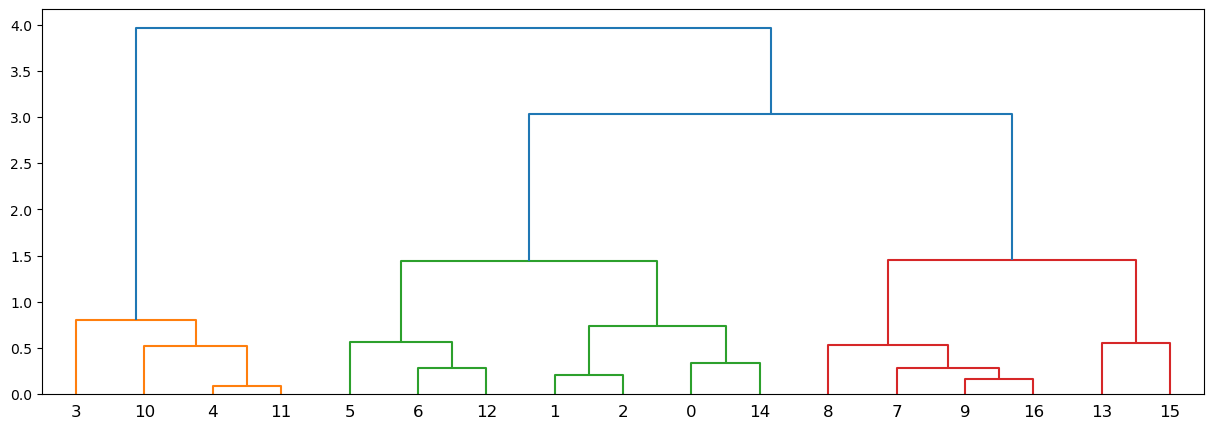

In [11]:
plt.figure(figsize=(15, 5))
dn = dendrogram(linkage(df1[['z_calories', 'z_costs']], 'complete'))
# Furthest neighbor / Complete-linkage

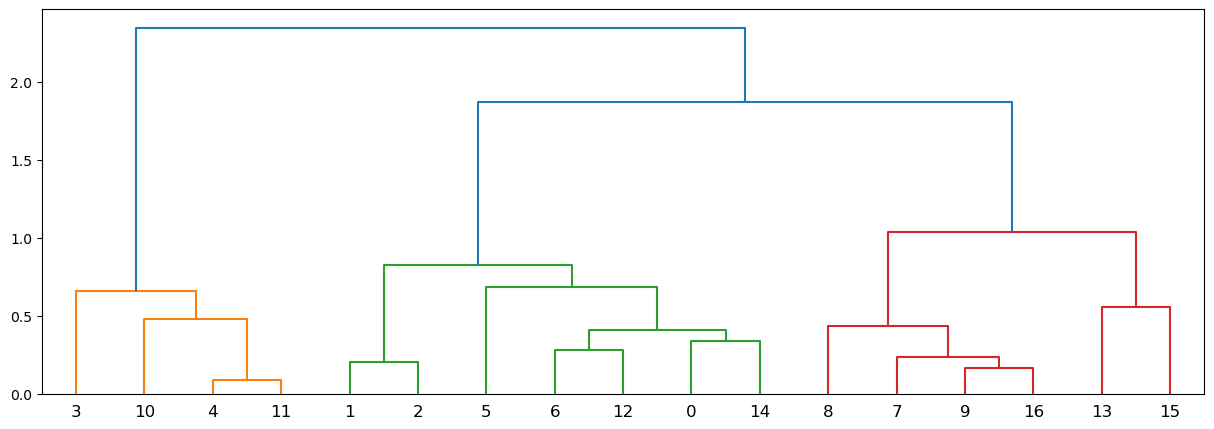

In [12]:
plt.figure(figsize=(15, 5))
dn = dendrogram(linkage(df1[['z_calories', 'z_costs']], 'centroid'))
# Centroid Clustering

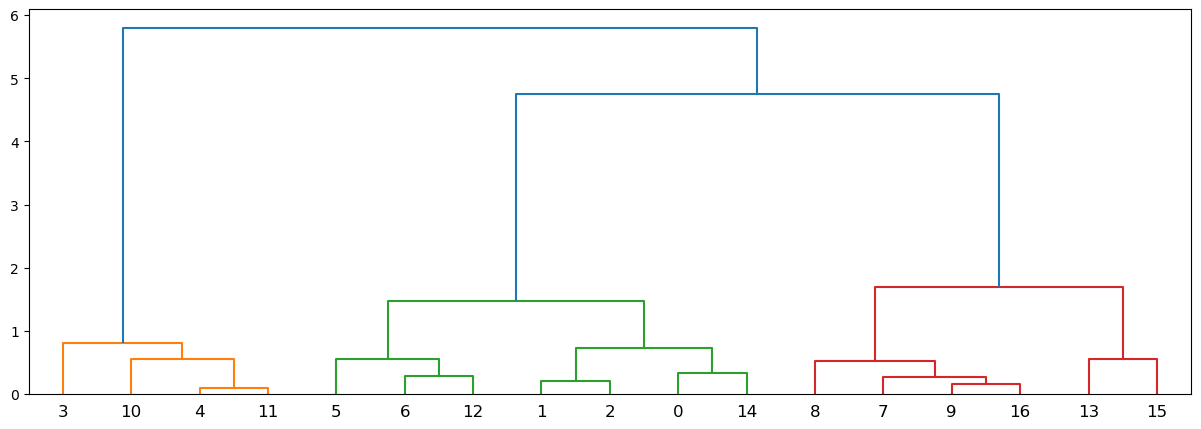

In [13]:
plt.figure(figsize=(15, 5))
dn = dendrogram(linkage(df1[['z_calories', 'z_costs']], 'ward'))
# Ward's Method

### Calinski-Harabasz Index 

[About calinski_harabasz_score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.calinski_harabasz_score.html)

In [14]:
from sklearn.metrics import calinski_harabasz_score
Z = linkage(df1[['z_calories', 'z_costs']], method='ward', metric='euclidean') 
labels = fcluster(Z, t=3, criterion='maxclust')  # t defines the number of clusters
calinski_harabasz_score(df1[['z_calories', 'z_costs']], labels)

50.32657953724121

In [15]:
for k in range (2, 10):
    labels = fcluster(Z, t=k, criterion='maxclust')
    print('Number of clusters: {}, index {}'.format(k, calinski_harabasz_score(df1[['z_calories', 'z_costs']], labels)))

Number of clusters: 2, index 16.64498460748926
Number of clusters: 3, index 50.32657953724121
Number of clusters: 4, index 51.80382074566064
Number of clusters: 5, index 67.0535707144872
Number of clusters: 6, index 65.19050945075712
Number of clusters: 7, index 66.63167402114675
Number of clusters: 8, index 64.58809025811043
Number of clusters: 9, index 66.99883144398997


In [16]:
labels = fcluster(Z, t=3, criterion='maxclust')
labels

array([2, 2, 2, 1, 1, 2, 2, 3, 3, 3, 1, 1, 2, 3, 2, 3, 3], dtype=int32)

In [17]:
df1['cluster_labels'] = labels  # new variable showing to which cluster the observation belongs to
df1

bier producer  costs  calories  alcohol  z_calories  \
0            Budweiser      USA   0.43       144      4.7    0.400407   
1            Lowenbrau      USA   0.48       157      4.9    0.804471   
2             Michelob      USA   0.50       162      5.0    0.959880   
3          Kronenbourg   France   0.73       170      5.2    1.208535   
4             Heineken  Holland   0.77       152      5.0    0.649062   
5             Schmidts      USA   0.30       147      4.7    0.493653   
6    Pabst Blue Ribbon      USA   0.38       152      4.9    0.649062   
7         Miller Light      USA   0.43        99      4.3   -0.998275   
8      Budweiser Light      USA   0.44       113      3.7   -0.563130   
9          Coors Light      USA   0.46       102      4.1   -0.905030   
10           Dos Equis   Mexico   0.70       145      4.5    0.431489   
11               Becks  Germany   0.76       150      4.7    0.586898   
12        Rolling Rock      USA   0.36       144      4.7    0.400407   
13   Pabst Extra Light      USA   0.38        68      2.3   -1.961812   
14              Tuborg      USA   0.43       155      5.0    0.742307   
15  Olympia Gold Light      USA   0.46        72      2.9   -1.837485   
16       Schlitz Light      USA   0.47        97      4.2   -1.060439   

     z_costs  cluster_labels  
0  -0.468980               2  
1  -0.128268               2  
2   0.008017               2  
3   1.575291               1  
4   1.847861               1  
5  -1.354830               2  
6  -0.809692               2  
7  -0.468980               3  
8  -0.400837               3  
9  -0.264553               3  
10  1.370864               1  
11  1.779718               1  
12 -0.945976               2  
13 -0.809692               3  
14 -0.468980               2  
15 -0.264553               3  
16 -0.196410               3

###  Descriptive statistics by clusters

In [20]:
df1[['costs', 'calories']].mean()

costs         0.498824
calories    131.117647
dtype: float64

In [21]:
df1.groupby('cluster_labels')[['costs', 'calories']].mean()

costs    calories
cluster_labels                      
1               0.740000  154.250000
2               0.411429  151.571429
3               0.440000   91.833333

In [22]:
df1['cluster_labels'].value_counts()

cluster_labels
2    7
3    6
1    4
Name: count, dtype: int64

##  Description of clusters

TBD

### Example 1.2. Candidates Assesment <a id="section_1_2"></a>

File `assess.xlsx`


Variables:
- `nr`  - Identification of the candidate
- `name` - Name of the candidate 
- `t1` - Memory for numbers (values of t1 - t10 vary from 1 - poor to 10 - excellent)
- `t2` - Mathematical skills
- `t3` - Readiness for direct dialogues
- `t4` - Ability to prepare algorithms
- `t5` - Speech confidence
- `t6` - Team Spirit
- `t7` - Resourcefulness
- `t8` - Cooperation
- `t9` - Recognition by others
- `t10` - Ability to persuade

In [23]:
df2 = pd.read_excel('assess.xlsx', index_col=0)
df2

name  t1  t2  t3  t4  t5  t6  t7  t8  t9  t10
nr                                                     
1     Volker R  10  10   9  10  10  10   9  10  10    9
2     Sigrid K  10  10   4  10   5   5   4   5   4    3
3      Elmar M   5   4  10   5  10   4  10   5   3   10
4      Peter B  10  10   9  10  10  10   9  10  10    9
5       Otto R   4   3   5   4   3  10   4  10  10    5
6       Elke M  10  10   4  10   5   4   3   4   5    5
7      Sarah K   4   4   5   5   4  10   5  10  10    6
8      Peter T   4   5   3   4   5  10   4  10  10    4
9     Gudrun M   4   5  10   4  10   5  10   4   3   10
10  Siglinde P  10  10   4  10   5   4   4   5   4    4
11    Werner W   4   5  10   5  10   4  10   4   5   10
12     Achim Z  10  10   9  10  10   9   9  10  10   10
13    Dieter K   6   5   4   3   5  10   5  10  10    5
14     Boris P   4   5  10   4  10   5  10   3   4   10
15     Silke W  10  10   9  10  10   9  10   9  10   10
16     Clara T   6   5   3   4   4  10   4  10  10    5
17   Manfred K  10  10   5  10   4   5   4   3   4    5
18   Richard M   4   5  10   4  10   4  10   4   4   10

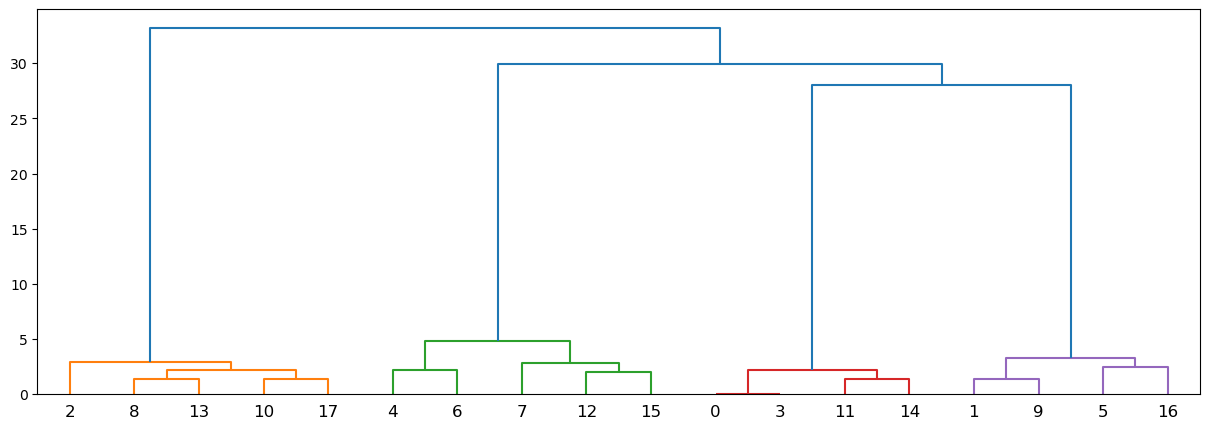

In [24]:
plt.figure(figsize=(15, 5))
dn = dendrogram(linkage(df2[['t1', 't2', 't3', 't4', 't5', 't6', 't7', 't8', 't9', 't10']], 'ward'))
# Ward's Method

In [25]:
Z = linkage(df2[['t1', 't2', 't3', 't4', 't5', 't6', 't7', 't8', 't9', 't10']], method='ward', metric='euclidean') 
for k in range (2, 15):
    labels = fcluster(Z, t=k, criterion='maxclust')
    print('Number of clusters: {}, index {}'.format(k, calinski_harabasz_score(df2[['t1', 't2', 't3', 't4', 't5', 't6', 't7', 't8', 't9', 't10']], labels)))

Number of clusters: 2, index 10.014207154732421
Number of clusters: 3, index 17.269744416302096
Number of clusters: 4, index 155.46624136097822
Number of clusters: 5, index 150.59763476347635
Number of clusters: 6, index 136.40645161290323
Number of clusters: 7, index 126.44037940379404
Number of clusters: 8, index 122.75613275613274
Number of clusters: 9, index 118.40277777777777
Number of clusters: 10, index 115.01683501683502
Number of clusters: 11, index 115.01683501683502
Number of clusters: 12, index 129.84848484848484
Number of clusters: 13, index 148.99305555555554
Number of clusters: 14, index 148.99305555555554


In [26]:
labels = fcluster(Z, t=4, criterion='maxclust')  # 4 clusters
df2['cluster_labels'] = labels
df2

name  t1  t2  t3  t4  t5  t6  t7  t8  t9  t10  cluster_labels
nr                                                                     
1     Volker R  10  10   9  10  10  10   9  10  10    9               3
2     Sigrid K  10  10   4  10   5   5   4   5   4    3               4
3      Elmar M   5   4  10   5  10   4  10   5   3   10               1
4      Peter B  10  10   9  10  10  10   9  10  10    9               3
5       Otto R   4   3   5   4   3  10   4  10  10    5               2
6       Elke M  10  10   4  10   5   4   3   4   5    5               4
7      Sarah K   4   4   5   5   4  10   5  10  10    6               2
8      Peter T   4   5   3   4   5  10   4  10  10    4               2
9     Gudrun M   4   5  10   4  10   5  10   4   3   10               1
10  Siglinde P  10  10   4  10   5   4   4   5   4    4               4
11    Werner W   4   5  10   5  10   4  10   4   5   10               1
12     Achim Z  10  10   9  10  10   9   9  10  10   10               3
13    Dieter K   6   5   4   3   5  10   5  10  10    5               2
14     Boris P   4   5  10   4  10   5  10   3   4   10               1
15     Silke W  10  10   9  10  10   9  10   9  10   10               3
16     Clara T   6   5   3   4   4  10   4  10  10    5               2
17   Manfred K  10  10   5  10   4   5   4   3   4    5               4
18   Richard M   4   5  10   4  10   4  10   4   4   10               1

In [27]:
df2['cluster_labels'].value_counts()

cluster_labels
1    5
2    5
3    4
4    4
Name: count, dtype: int64

In [28]:
df2.columns

Index(['name', 't1', 't2', 't3', 't4', 't5', 't6', 't7', 't8', 't9', 't10',
       'cluster_labels'],
      dtype='object')

In [29]:
df2.columns = ['Name', 'Memory for numbers', 'Mathematical skills', 'Readiness for direct dialogues', 
              'Ability to prepare algorithms', 'Speech confidence', 'Team Spirit', 'Resourcefulness',
              'Cooperation', 'Recognition by others', 'Ability to persuade', 'Clusters']
df2

Name  Memory for numbers  Mathematical skills  \
nr                                                        
1     Volker R                  10                   10   
2     Sigrid K                  10                   10   
3      Elmar M                   5                    4   
4      Peter B                  10                   10   
5       Otto R                   4                    3   
6       Elke M                  10                   10   
7      Sarah K                   4                    4   
8      Peter T                   4                    5   
9     Gudrun M                   4                    5   
10  Siglinde P                  10                   10   
11    Werner W                   4                    5   
12     Achim Z                  10                   10   
13    Dieter K                   6                    5   
14     Boris P                   4                    5   
15     Silke W                  10                   10   
16     Clara T                   6                    5   
17   Manfred K                  10                   10   
18   Richard M                   4                    5   

    Readiness for direct dialogues  Ability to prepare algorithms  \
nr                                                                  
1                                9                             10   
2                                4                             10   
3                               10                              5   
4                                9                             10   
5                                5                              4   
6                                4                             10   
7                                5                              5   
8                                3                              4   
9                               10                              4   
10                               4                             10   
11                              10                              5   
12                               9                             10   
13                               4                              3   
14                              10                              4   
15                               9                             10   
16                               3                              4   
17                               5                             10   
18                              10                              4   

    Speech confidence  Team Spirit  Resourcefulness  Cooperation  \
nr                                                                 
1                  10           10                9           10   
2                   5            5                4            5   
3                  10            4               10            5   
4                  10           10                9           10   
5                   3           10                4           10   
6                   5            4                3            4   
7                   4           10                5           10   
8                   5           10                4           10   
9                  10            5               10            4   
10                  5            4                4            5   
11                 10            4               10            4   
12                 10            9                9           10   
13                  5           10                5           10   
14                 10            5               10            3   
15                 10            9               10            9   
16                  4           10                4           10   
17                  4            5                4            3   
18                 10            4               10            4   

    Recognition by others  Ability to persuade  Clusters  
nr                          

In [30]:
df2.groupby('Clusters').mean(numeric_only=True)

Memory for numbers  Mathematical skills  \
Clusters                                            
1                        4.2                  4.8   
2                        4.8                  4.4   
3                       10.0                 10.0   
4                       10.0                 10.0   

          Readiness for direct dialogues  Ability to prepare algorithms  \
Clusters                                                                  
1                                  10.00                            4.4   
2                                   4.00                            4.0   
3                                   9.00                           10.0   
4                                   4.25                           10.0   

          Speech confidence  Team Spirit  Resourcefulness  Cooperation  \
Clusters                                                                 
1                     10.00          4.4            10.00         4.00   
2                      4.20         10.0             4.40        10.00   
3                     10.00          9.5             9.25         9.75   
4                      4.75          4.5             3.75         4.25   

          Recognition by others  Ability to persuade  
Clusters                                              
1                          3.80                10.00  
2                         10.00                 5.00  
3                         10.00                 9.50  
4                          4.25                 4.25

In [31]:
df2.groupby('Clusters').mean(numeric_only=True).T

Clusters                           1     2      3      4
Memory for numbers               4.2   4.8  10.00  10.00
Mathematical skills              4.8   4.4  10.00  10.00
Readiness for direct dialogues  10.0   4.0   9.00   4.25
Ability to prepare algorithms    4.4   4.0  10.00  10.00
Speech confidence               10.0   4.2  10.00   4.75
Team Spirit                      4.4  10.0   9.50   4.50
Resourcefulness                 10.0   4.4   9.25   3.75
Cooperation                      4.0  10.0   9.75   4.25
Recognition by others            3.8  10.0  10.00   4.25
Ability to persuade             10.0   5.0   9.50   4.25

##  Description of clusters

TBD

## 2. k-means cluster analysis <a class="anchor" id="chapter2"></a>

[About KMeans](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html)

### Example 2.1. Synthetic data <a id="section_2_1"></a>

In [27]:
np.random.seed(123)
X1 = np.random.randn(100,2)
X2 = np.random.randn(100,2) - np.array([10,1])
X3 = np.random.randn(100,2) - np.array([1,10])
X = np.vstack((X1,X2,X3))
y = np.array([1]*100 + [2]*100 + [3]*100)

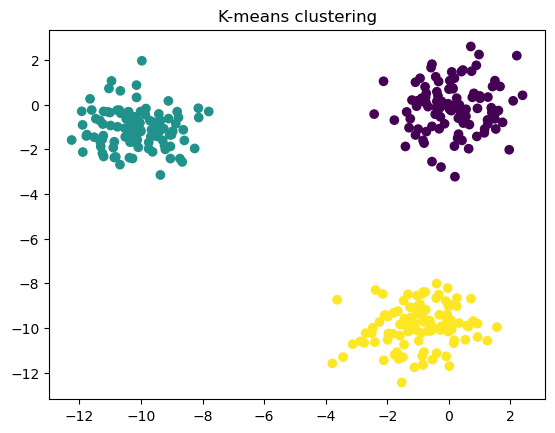

In [28]:
k_means = KMeans(n_clusters = 3)
k_means = k_means.fit(X)
clusters = k_means.predict(X)
plt.scatter(X[:,0], X[:,1], c = clusters)
plt.title('K-means clustering')
plt.show()

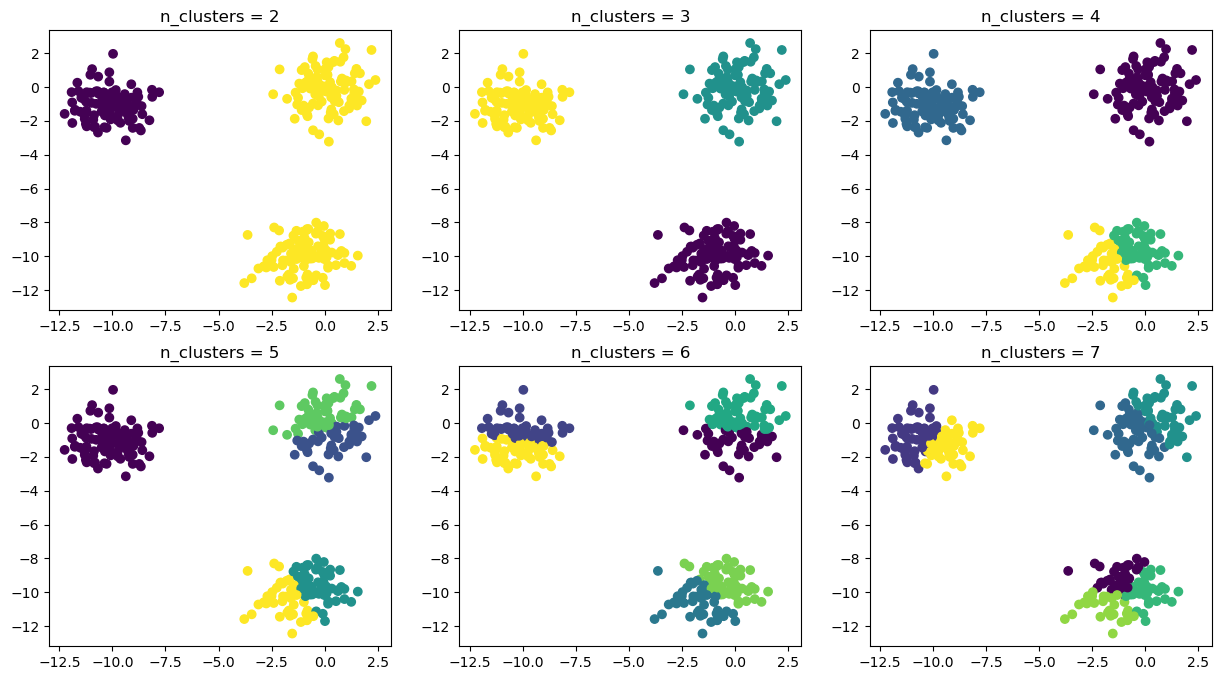

In [29]:
plt.figure(figsize= (15,8))
for n_c in range(2,8):
    k_means = KMeans(n_clusters = n_c)
    k_means = k_means.fit(X)
    clusters = k_means.predict(X)
    plt.subplot(2,3,n_c - 1)
    plt.scatter(X[:,0], X[:,1], c = clusters)
    plt.title('n_clusters = {}'.format(n_c))

plt.show()

Inertia is calculated by measuring the distance between each data point and its centroid, squaring this distance, and summing these squares across one cluster. A good model is one with low inertia AND a low number of clusters. However, this is a tradeoff because as K increases, inertia decreases.

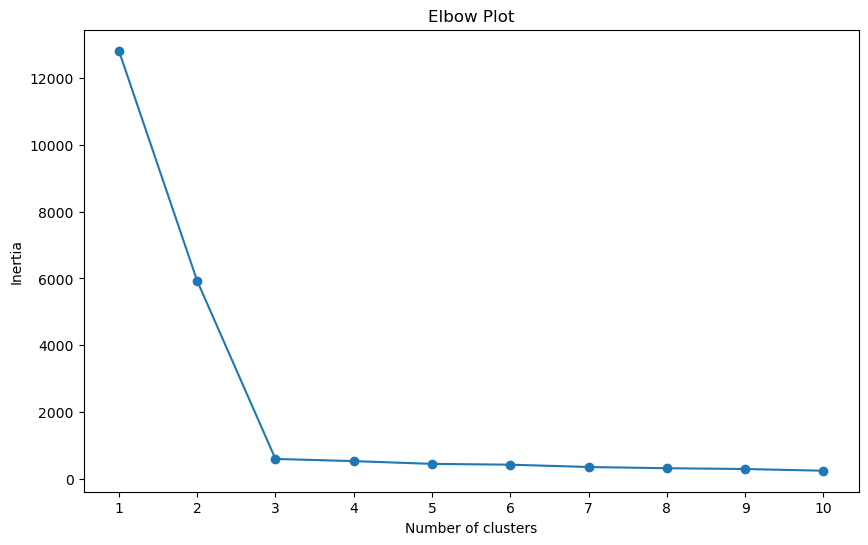

In [30]:
inertia = []
k_range = range(1, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=1)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)
plt.figure(figsize=(10, 6))
plt.plot(k_range, inertia, marker='o')
plt.title('Elbow Plot')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.xticks(k_range)
plt.show()

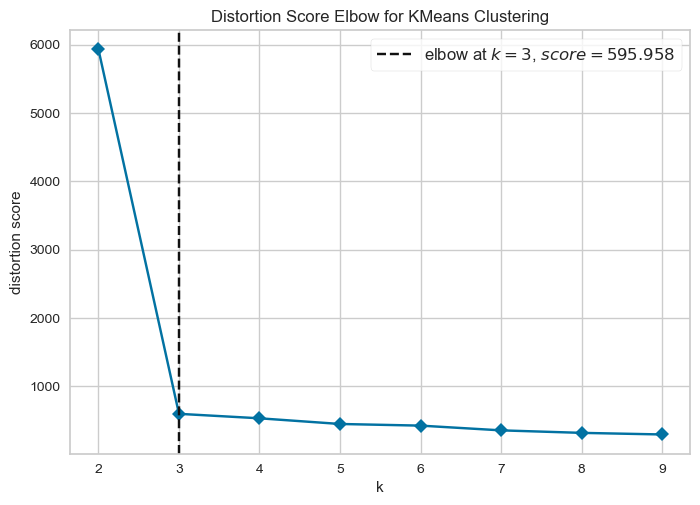

In [31]:
from yellowbrick.cluster import KElbowVisualizer

model = KMeans(random_state=1)
visualizer = KElbowVisualizer(model, k=(2,10), timings=False)

visualizer.fit(X)
visualizer.show()
plt.show()

Distortion is the average of the euclidean squared distance from the centroid of the respective clusters. Inertia is the sum of squared distances of samples to their closest cluster centre.

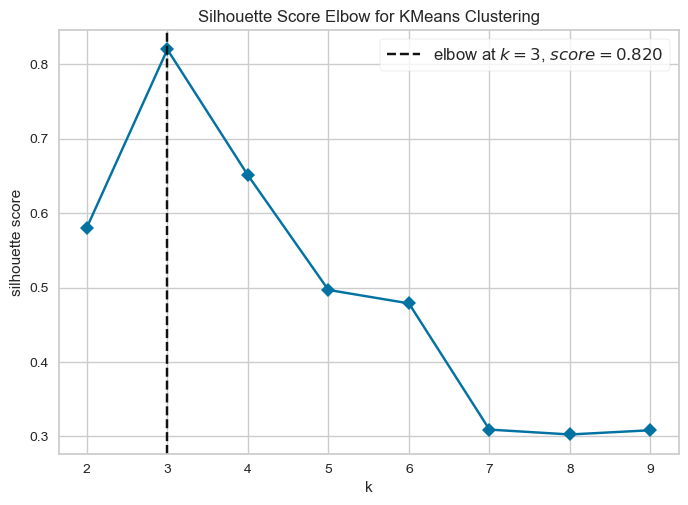

In [32]:
model = KMeans(random_state=1)
visualizer = KElbowVisualizer(model, k=(2,10), metric='silhouette', timings=False)

visualizer.fit(X)
visualizer.show()
plt.show()

**The silhouette value**

The silhouette score measures how similar the data points inside the cluster are compared to how different the clusters are from each other. The silhouette score calculation involves two core components: cohesion and separation. Cohesion measures the similarity of the points within the cluster. Separation shows the degree to which the clusters don't overlap.

Silhouette values lie in the [-1, 1] interval, with -1 indicating a misclassified point, 1 indicating that the point is closely tied with its cluster and poorly matched with the neighboring clusters, and a score of 0 means that there is no clear separation between the clusters and they might overlap. Generally speaking, scores of 0.7 and higher are considered acceptable.

[More information about silhouette score](https://hyperskill.org/learn/step/28303)

### Example 2.2. YouTube <a id="section_2_2"></a>

[About dataset](https://www.kaggle.com/datasnaek/youtube-new)

In [32]:
df3 = pd.read_excel('youtube.xlsx')
df3

video_id                                              title  \
0     FlsCjmMhFmw  YouTube Rewind: The Shape of 2017 | #YouTubeRe...   
1     FlsCjmMhFmw  YouTube Rewind: The Shape of 2017 | #YouTubeRe...   
2     FlsCjmMhFmw  YouTube Rewind: The Shape of 2017 | #YouTubeRe...   
3     FlsCjmMhFmw  YouTube Rewind: The Shape of 2017 | #YouTubeRe...   
4     TyHvyGVs42U          Luis Fonsi, Demi Lovato - Échame La Culpa   
...           ...                                                ...   
3368  mE9oqeXj4WY  DOMO WILSON REACTED TO MY SONG!!! (REACTION VI...   
3369  ItL6vcUrpUs  MACKLEMORE FEAT DAVE B & TRAVIS THOMPSON - COR...   
3370  CWAX-tiepMo  RWBY Volume 5: Chapter 14 - Haven's Fate | Roo...   
3371  B9nVxg3DqAM  Developer Update | Happy Year of the Dog! | Ov...   
3372  IjTBcqpl2kc               The Queen's Christmas Broadcast 2017   

          channel_title              publish_time      views    likes  \
0     YouTube Spotlight  2017-12-06T17:58:51.000Z  149376127  3093544   
1     YouTube Spotlight  2017-12-06T17:58:51.000Z  137843120  3014471   
2     YouTube Spotlight  2017-12-06T17:58:51.000Z  125432237  2912702   
3     YouTube Spotlight  2017-12-06T17:58:51.000Z  113874632  2811215   
4         LuisFonsiVEVO  2017-11-17T05:00:01.000Z  102012605  2376636   
...                 ...                       ...        ...      ...   
3368        Queen Naija  2018-01-09T23:25:37.000Z    1381198   123524   
3369     Macklemore LLC  2017-12-21T17:00:20.000Z    1381081    70142   
3370      Rooster Teeth  2018-01-27T16:00:00.000Z    1380940    49981   
3371      PlayOverwatch  2018-02-07T00:55:22.000Z    1380249    42754   
3372   The Royal Family  2017-12-25T15:02:43.000Z    1379675    36577   

      dislikes  comment_count country  
0      1643059         810698      US  
1      1602383         817582      US  
2      1545015         807558      US  
3      1470383         787174      US  
4       117196         134224      US  
...        ...            ...     ...  
3368      1029          11970      US  
3369      1790           3131      US  
3370      2818          20286      US  
3371      1225           9455      US  
3372      3734              0      US  

[3373 rows x 9 columns]

In [33]:
df3['z_views'] = (df3['views'] - df3['views'].mean())/df3['views'].std()
df3['z_likes'] = (df3['likes'] - df3['likes'].mean())/df3['likes'].std()
df3['z_dislikes'] = (df3['dislikes'] - df3['dislikes'].mean())/df3['dislikes'].std()
df3['z_comment_count'] = (df3['comment_count'] - df3['comment_count'].mean())/df3['comment_count'].std()
df3

video_id                                              title  \
0     FlsCjmMhFmw  YouTube Rewind: The Shape of 2017 | #YouTubeRe...   
1     FlsCjmMhFmw  YouTube Rewind: The Shape of 2017 | #YouTubeRe...   
2     FlsCjmMhFmw  YouTube Rewind: The Shape of 2017 | #YouTubeRe...   
3     FlsCjmMhFmw  YouTube Rewind: The Shape of 2017 | #YouTubeRe...   
4     TyHvyGVs42U          Luis Fonsi, Demi Lovato - Échame La Culpa   
...           ...                                                ...   
3368  mE9oqeXj4WY  DOMO WILSON REACTED TO MY SONG!!! (REACTION VI...   
3369  ItL6vcUrpUs  MACKLEMORE FEAT DAVE B & TRAVIS THOMPSON - COR...   
3370  CWAX-tiepMo  RWBY Volume 5: Chapter 14 - Haven's Fate | Roo...   
3371  B9nVxg3DqAM  Developer Update | Happy Year of the Dog! | Ov...   
3372  IjTBcqpl2kc               The Queen's Christmas Broadcast 2017   

          channel_title              publish_time      views    likes  \
0     YouTube Spotlight  2017-12-06T17:58:51.000Z  149376127  3093544   
1     YouTube Spotlight  2017-12-06T17:58:51.000Z  137843120  3014471   
2     YouTube Spotlight  2017-12-06T17:58:51.000Z  125432237  2912702   
3     YouTube Spotlight  2017-12-06T17:58:51.000Z  113874632  2811215   
4         LuisFonsiVEVO  2017-11-17T05:00:01.000Z  102012605  2376636   
...                 ...                       ...        ...      ...   
3368        Queen Naija  2018-01-09T23:25:37.000Z    1381198   123524   
3369     Macklemore LLC  2017-12-21T17:00:20.000Z    1381081    70142   
3370      Rooster Teeth  2018-01-27T16:00:00.000Z    1380940    49981   
3371      PlayOverwatch  2018-02-07T00:55:22.000Z    1380249    42754   
3372   The Royal Family  2017-12-25T15:02:43.000Z    1379675    36577   

      dislikes  comment_count country    z_views   z_likes  z_dislikes  \
0      1643059         810698      US  15.589827  9.347265   17.683401   
1      1602383         817582      US  14.341644  9.093412   17.241942   
2      1545015         807558      US  12.998451  8.766698   16.619323   
3      1470383         787174      US  11.747606  8.440888   15.809337   
4       117196         134224      US  10.463814  7.045735    1.123107   
...        ...            ...     ...        ...       ...         ...   
3368      1029          11970      US  -0.427225 -0.187555   -0.137661   
3369      1790           3131      US  -0.427237 -0.358931   -0.129402   
3370      2818          20286      US  -0.427253 -0.423655   -0.118245   
3371      1225           9455      US  -0.427328 -0.446856   -0.135534   
3372      3734              0      US  -0.427390 -0.466686   -0.108304   

      z_comment_count  
0            9.883878  
1            9.970357  
2            9.844432  
3            9.588360  
4            1.385748  
...               ...  
3368        -0.150055  
3369        -0.261094  
3370        -0.045586  
3371        -0.181649  
3372        -0.300427  

[3373 rows x 13 columns]

In [34]:
X = df3[['z_views', 'z_likes', 'z_dislikes', 'z_comment_count']]
X

z_views   z_likes  z_dislikes  z_comment_count
0     15.589827  9.347265   17.683401         9.883878
1     14.341644  9.093412   17.241942         9.970357
2     12.998451  8.766698   16.619323         9.844432
3     11.747606  8.440888   15.809337         9.588360
4     10.463814  7.045735    1.123107         1.385748
...         ...       ...         ...              ...
3368  -0.427225 -0.187555   -0.137661        -0.150055
3369  -0.427237 -0.358931   -0.129402        -0.261094
3370  -0.427253 -0.423655   -0.118245        -0.045586
3371  -0.427328 -0.446856   -0.135534        -0.181649
3372  -0.427390 -0.466686   -0.108304        -0.300427

[3373 rows x 4 columns]

In [35]:
for k in range (2, 15):
    labels = KMeans(n_clusters=k).fit_predict(X)
    print('Number of clusters: {}, index {}'.format(k, calinski_harabasz_score(X, labels)))

Number of clusters: 2, index 3327.1760128427354
Number of clusters: 3, index 3932.3566710828145
Number of clusters: 4, index 4268.26494575675
Number of clusters: 5, index 3990.874473278836
Number of clusters: 6, index 4037.700345195353
Number of clusters: 7, index 4312.98206986972
Number of clusters: 8, index 4288.28563411826
Number of clusters: 9, index 4368.313094976286
Number of clusters: 10, index 4435.421036382169
Number of clusters: 11, index 4517.16220154949
Number of clusters: 12, index 4568.6315676283275
Number of clusters: 13, index 4695.443797470778
Number of clusters: 14, index 4808.613647699657


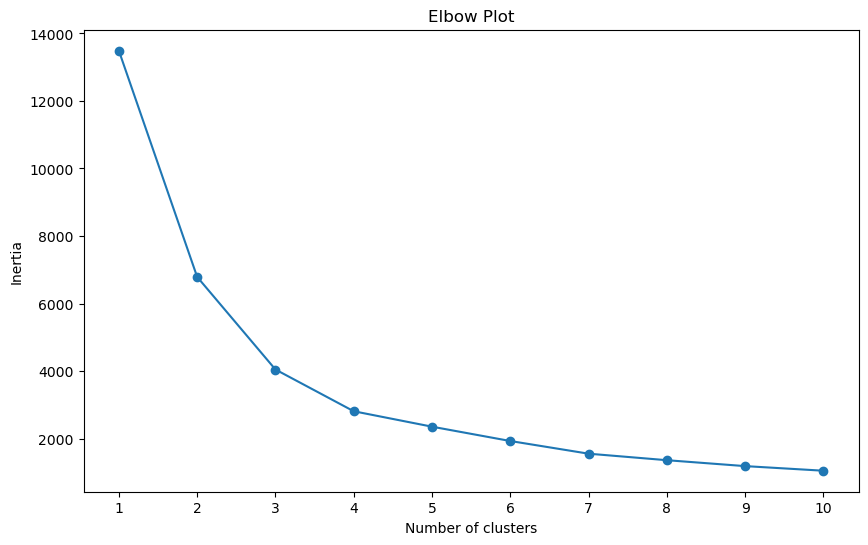

In [36]:
inertia = []
k_range = range(1, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=1)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)
plt.figure(figsize=(10, 6))
plt.plot(k_range, inertia, marker='o')
plt.title('Elbow Plot')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.xticks(k_range)
plt.show()

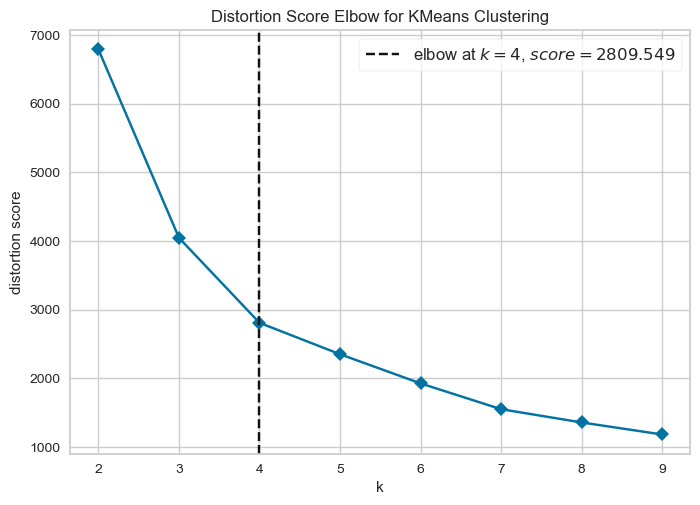

In [37]:
from yellowbrick.cluster import KElbowVisualizer

model = KMeans(random_state=1)
visualizer = KElbowVisualizer(model, k=(2,10), timings=False)

visualizer.fit(X)
visualizer.show()
plt.show()

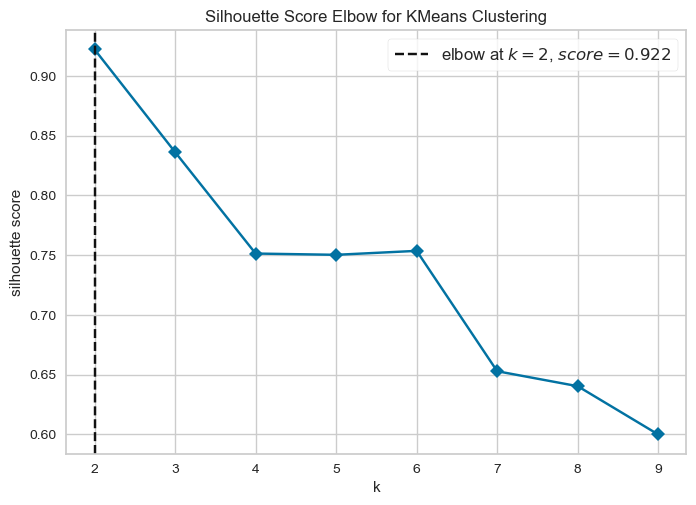

In [38]:
model = KMeans(random_state=1)
visualizer = KElbowVisualizer(model, k=(2,10), metric='silhouette', timings=False)

visualizer.fit(X)
visualizer.show()
plt.show()

In [39]:
kmeans_model = KMeans(n_clusters=4).fit_predict(X)

In [40]:
df3['Clusters'] = kmeans_model
df3.head()

video_id                                              title  \
0  FlsCjmMhFmw  YouTube Rewind: The Shape of 2017 | #YouTubeRe...   
1  FlsCjmMhFmw  YouTube Rewind: The Shape of 2017 | #YouTubeRe...   
2  FlsCjmMhFmw  YouTube Rewind: The Shape of 2017 | #YouTubeRe...   
3  FlsCjmMhFmw  YouTube Rewind: The Shape of 2017 | #YouTubeRe...   
4  TyHvyGVs42U          Luis Fonsi, Demi Lovato - Échame La Culpa   

       channel_title              publish_time      views    likes  dislikes  \
0  YouTube Spotlight  2017-12-06T17:58:51.000Z  149376127  3093544   1643059   
1  YouTube Spotlight  2017-12-06T17:58:51.000Z  137843120  3014471   1602383   
2  YouTube Spotlight  2017-12-06T17:58:51.000Z  125432237  2912702   1545015   
3  YouTube Spotlight  2017-12-06T17:58:51.000Z  113874632  2811215   1470383   
4      LuisFonsiVEVO  2017-11-17T05:00:01.000Z  102012605  2376636    117196   

   comment_count country    z_views   z_likes  z_dislikes  z_comment_count  \
0         810698      US  15.589827  9.347265   17.683401         9.883878   
1         817582      US  14.341644  9.093412   17.241942         9.970357   
2         807558      US  12.998451  8.766698   16.619323         9.844432   
3         787174      US  11.747606  8.440888   15.809337         9.588360   
4         134224      US  10.463814  7.045735    1.123107         1.385748   

   Clusters  
0         1  
1         1  
2         1  
3         1  
4         3

In [41]:
df3['Clusters'].value_counts()

Clusters
0    3053
2     264
3      43
1      13
Name: count, dtype: int64

In [42]:
df3[['z_views', 'z_likes', 'z_dislikes', 'z_comment_count']].mean(numeric_only=True)

z_views           -3.370496e-17
z_likes            6.740992e-17
z_dislikes        -1.685248e-17
z_comment_count    0.000000e+00
dtype: float64

In [43]:
df3.groupby('Clusters')[['z_views', 'z_likes', 'z_dislikes', 'z_comment_count']].mean(numeric_only=True)

z_views   z_likes  z_dislikes  z_comment_count
Clusters                                                 
0        -0.213956 -0.234861   -0.100620        -0.154653
1         7.307315  5.908843   15.037658        12.158660
2         1.412803  1.468792    0.170041         0.535895
3         4.307716  5.871012    1.553765         4.014361

###  Description of clusters

TBD

## 3. DBSCAN <a class="anchor" id="chapter3"></a>

<p><a href="https://commons.wikimedia.org/wiki/File:DBSCAN-Illustration.svg#/media/Файл:DBSCAN-Illustration.svg"><img src="https://upload.wikimedia.org/wikipedia/commons/thumb/a/af/DBSCAN-Illustration.svg/1200px-DBSCAN-Illustration.svg.png" alt="DBSCAN-Illustration.svg" width="450" height="450"> </a><br>

### Example 3.1. Synthetic data <a id="section_3_1"></a>

In [2]:
np.random.seed(123)
X1 = np.random.randn(100,2)
X2 = np.random.randn(100,2) - np.array([10,1])
X3 = np.random.randn(100,2) - np.array([1,10])
X = np.vstack((X1,X2,X3))
y = np.array([1]*100 + [2]*100 + [3]*100)

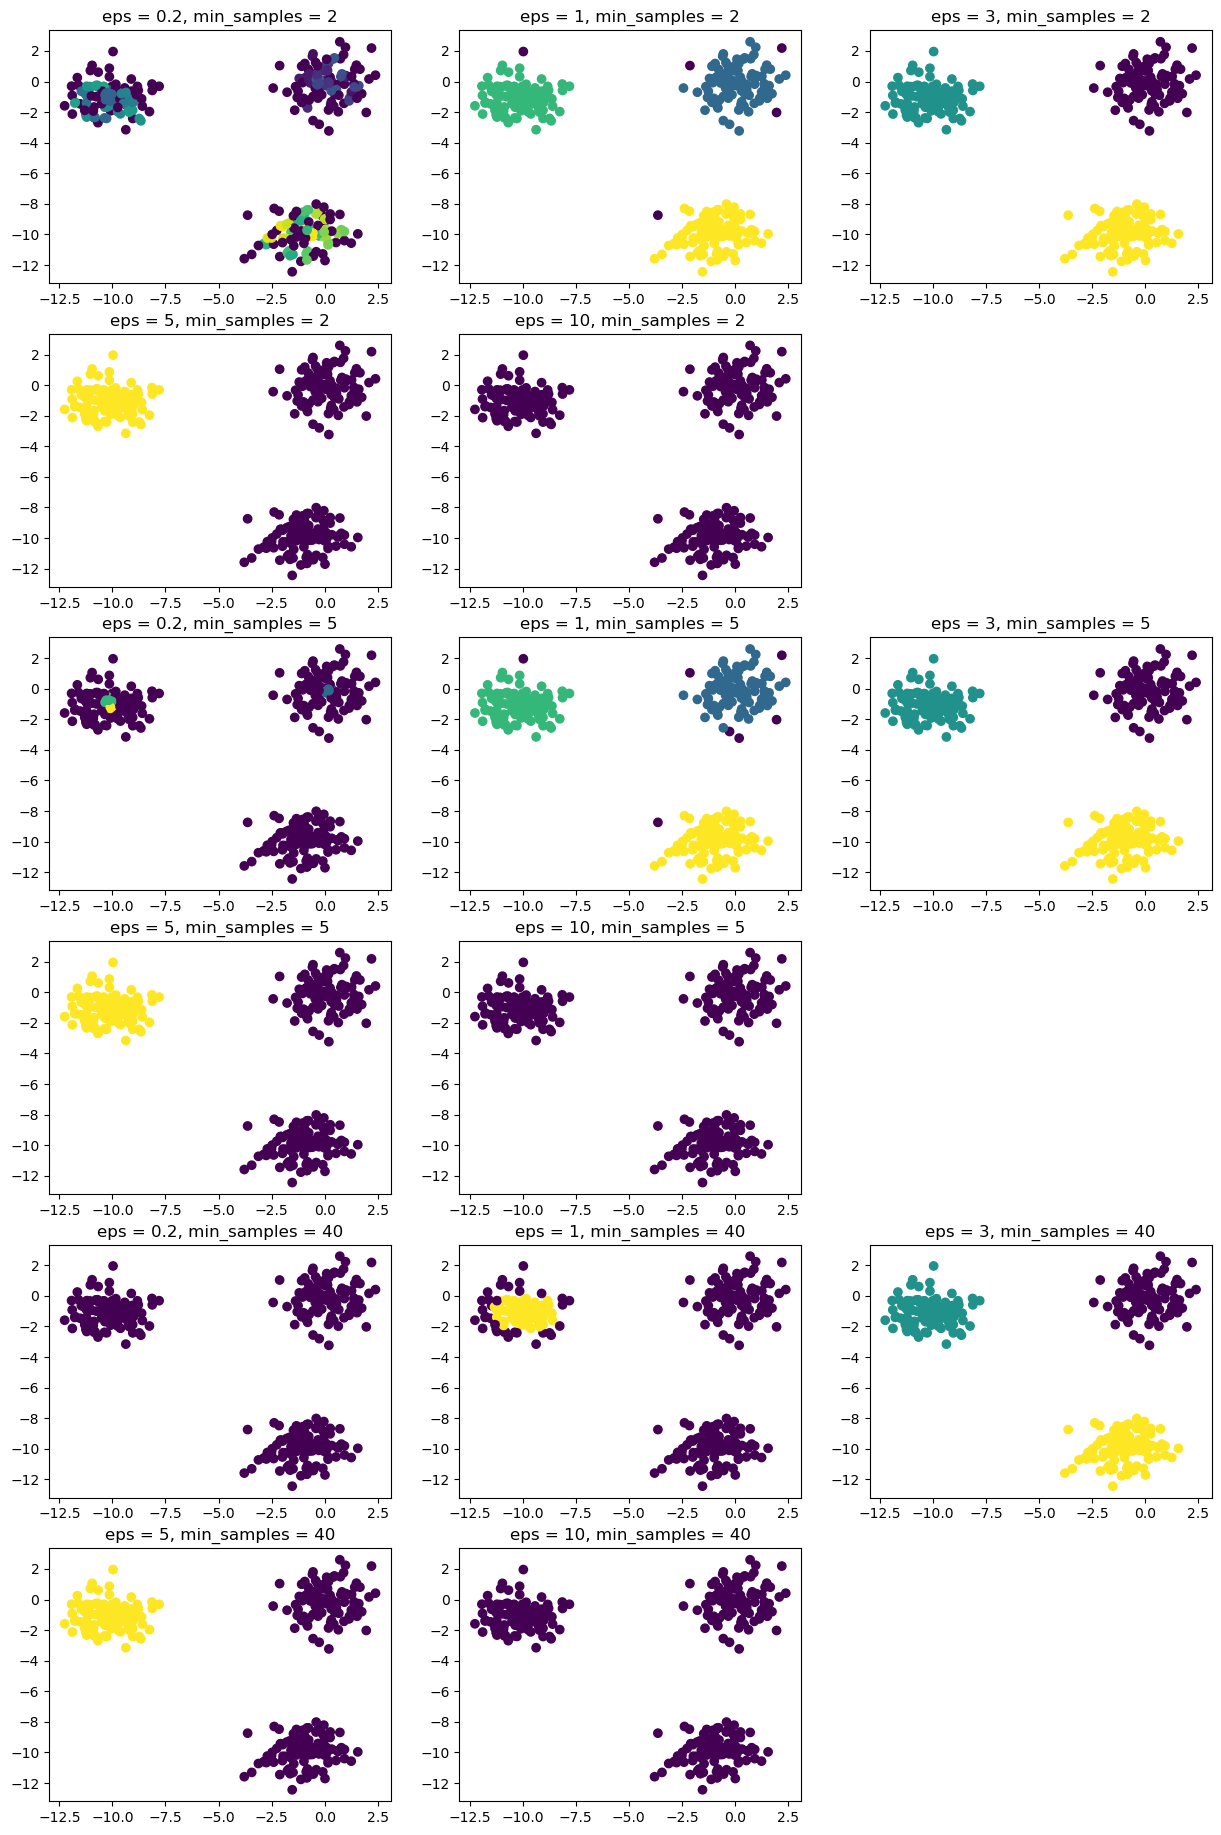

In [3]:
plt.figure(figsize= (15,23))
i = 1
for samples in [2, 5, 40]:
    for e in [0.2, 1, 3, 5, 10]:
        dbscan = DBSCAN(eps=e, min_samples=samples)
        clusters = dbscan.fit_predict(X)
        plt.subplot(6, 3, i)
        plt.scatter(X[:,0], X[:,1], c = clusters)
        plt.title('eps = {}, min_samples = {}'.format(e, samples))
        i += 1
    i+=1

plt.show()

### Example 3.2. Mall Customer Segmentation Data<a id="section_3_2"></a>

[About dataset](https://www.kaggle.com/datasets/vjchoudhary7/customer-segmentation-tutorial-in-python)

In [44]:
df4 = pd.read_csv('Mall_Customers.csv', index_col=0)
df4

Gender  Age  Annual Income (k$)  Spending Score (1-100)
CustomerID                                                         
1             Male   19                  15                      39
2             Male   21                  15                      81
3           Female   20                  16                       6
4           Female   23                  16                      77
5           Female   31                  17                      40
...            ...  ...                 ...                     ...
196         Female   35                 120                      79
197         Female   45                 126                      28
198           Male   32                 126                      74
199           Male   32                 137                      18
200           Male   30                 137                      83

[200 rows x 4 columns]

In [45]:
df4.describe()

Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000          200.000000              200.000000
mean    38.850000           60.560000               50.200000
std     13.969007           26.264721               25.823522
min     18.000000           15.000000                1.000000
25%     28.750000           41.500000               34.750000
50%     36.000000           61.500000               50.000000
75%     49.000000           78.000000               73.000000
max     70.000000          137.000000               99.000000

In [46]:
X_numerics = df4[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

### Hierarchical cluster analysis

In [47]:
from scipy.stats.mstats import zscore

In [48]:
X_numerics['zAge'] = zscore(X_numerics['Age'])
X_numerics['zIncome'] = zscore(X_numerics['Annual Income (k$)'])
X_numerics['zSpending'] = zscore(X_numerics['Spending Score (1-100)'])

In [49]:
X_numerics_z = X_numerics[['zAge', 'zIncome', 'zSpending']] 

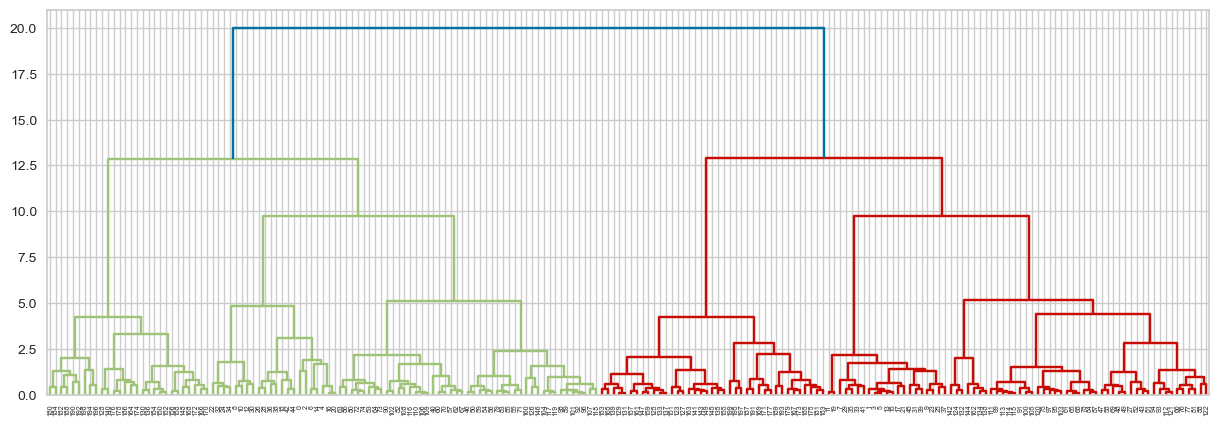

In [50]:
plt.figure(figsize=(15, 5))
dn = dendrogram(linkage(X_numerics_z, 'ward'))
# Ward's Method

In [51]:
from sklearn.metrics import calinski_harabasz_score
Z = linkage(X_numerics_z, method='ward', metric='euclidean') 
labels = fcluster(Z, t=2, criterion='maxclust')  
calinski_harabasz_score(X_numerics_z, labels)

99.00066801676013

In [52]:
for k in range (2, 10):
    labels = fcluster(Z, t=k, criterion='maxclust')
    print('Number of clusters: {}, index {}'.format(k, calinski_harabasz_score(X_numerics_z, labels)))

Number of clusters: 2, index 99.00066801676013
Number of clusters: 3, index 88.10174149244529
Number of clusters: 4, index 102.0193992602494
Number of clusters: 5, index 107.82656032570377
Number of clusters: 6, index 127.98645433956887
Number of clusters: 7, index 120.68680526925652
Number of clusters: 8, index 118.06679638909684
Number of clusters: 9, index 117.47512295202333


In [53]:
labels = fcluster(Z, t=6, criterion='maxclust')
labels

array([2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5,
       2, 5, 2, 5, 2, 6, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 3, 5, 2, 6,
       2, 5, 3, 6, 6, 6, 3, 6, 6, 3, 3, 3, 3, 3, 6, 3, 3, 6, 3, 3, 3, 6,
       6, 3, 6, 6, 3, 3, 3, 3, 3, 6, 6, 6, 6, 3, 3, 6, 3, 3, 6, 3, 3, 6,
       6, 3, 3, 6, 3, 6, 6, 6, 3, 6, 3, 6, 6, 3, 3, 6, 3, 6, 3, 3, 3, 3,
       3, 6, 6, 6, 6, 6, 3, 3, 3, 3, 6, 6, 6, 4, 6, 4, 3, 4, 1, 4, 1, 4,
       6, 4, 6, 4, 1, 4, 6, 4, 1, 4, 6, 4, 6, 4, 3, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 3, 4, 6, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4], dtype=int32)

In [54]:
df4['Cluster_Hierarchical'] = labels
df4

Gender  Age  Annual Income (k$)  Spending Score (1-100)  \
CustomerID                                                            
1             Male   19                  15                      39   
2             Male   21                  15                      81   
3           Female   20                  16                       6   
4           Female   23                  16                      77   
5           Female   31                  17                      40   
...            ...  ...                 ...                     ...   
196         Female   35                 120                      79   
197         Female   45                 126                      28   
198           Male   32                 126                      74   
199           Male   32                 137                      18   
200           Male   30                 137                      83   

            Cluster_Hierarchical  
CustomerID                        
1                              2  
2                              5  
3                              2  
4                              5  
5                              2  
...                          ...  
196                            4  
197                            1  
198                            4  
199                            1  
200                            4  

[200 rows x 5 columns]

###  Descriptive statistics by clusters

In [55]:
df4.groupby('Cluster_Hierarchical')[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].mean()

Age  Annual Income (k$)  Spending Score (1-100)
Cluster_Hierarchical                                                       
1                     43.892857           91.285714               16.678571
2                     44.318182           25.772727               20.272727
3                     56.400000           55.288889               48.355556
4                     32.692308           86.538462               82.128205
5                     24.809524           25.619048               80.238095
6                     27.377778           57.511111               45.844444

In [56]:
df4['Cluster_Hierarchical'].value_counts()

Cluster_Hierarchical
6    45
3    45
4    39
1    28
2    22
5    21
Name: count, dtype: int64

### k-means

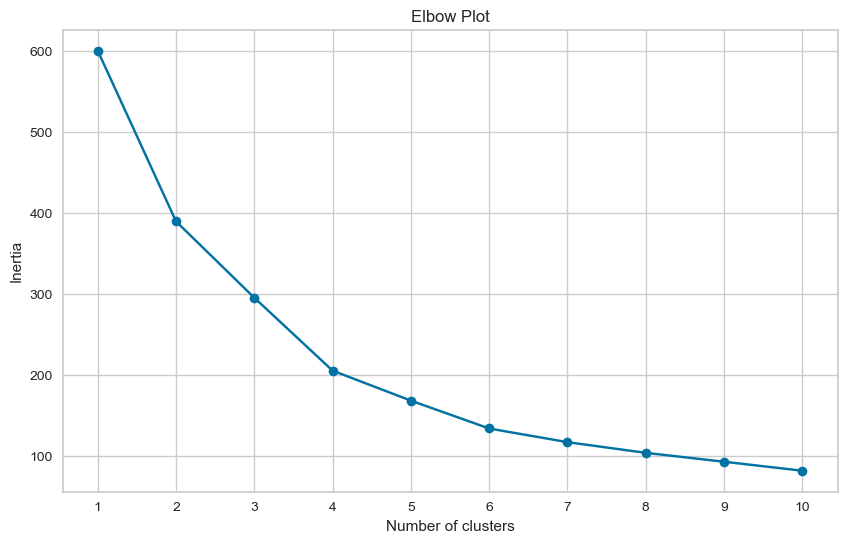

In [57]:
inertia = []
k_range = range(1, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=1)
    kmeans.fit(X_numerics_z)
    inertia.append(kmeans.inertia_)
plt.figure(figsize=(10, 6))
plt.plot(k_range, inertia, marker='o')
plt.title('Elbow Plot')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.xticks(k_range)
plt.show()

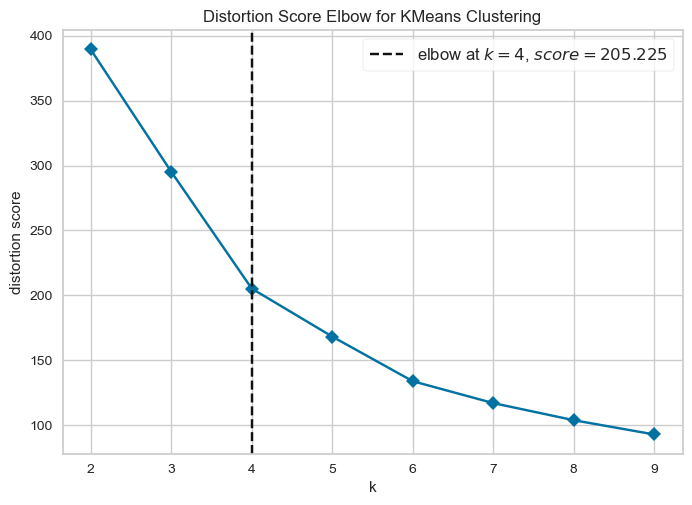

In [58]:
from yellowbrick.cluster import KElbowVisualizer

model = KMeans(random_state=1)
visualizer = KElbowVisualizer(model, k=(2,10), timings=False)

visualizer.fit(X_numerics_z)
visualizer.show()
plt.show()

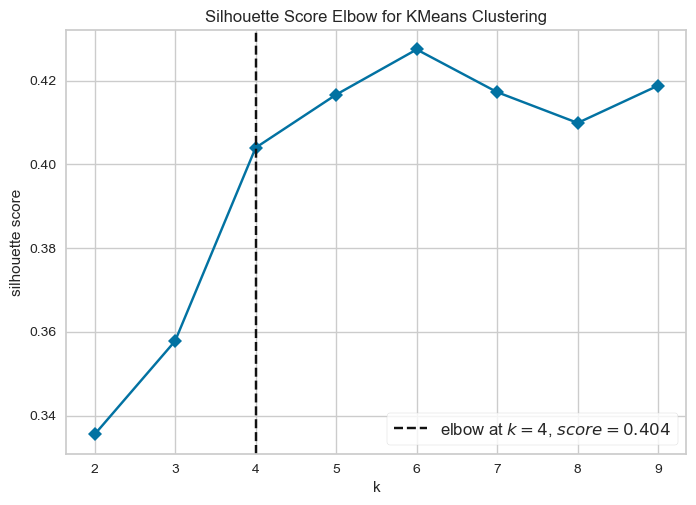

In [59]:
model = KMeans(random_state=1)
visualizer = KElbowVisualizer(model, k=(2,10), metric='silhouette', timings=False)

visualizer.fit(X_numerics_z)
visualizer.show()
plt.show()

In [60]:
kmeans_model = KMeans(n_clusters=4).fit_predict(X_numerics_z)

In [61]:
df4['Clusters_k-means'] = kmeans_model
df4.head()

Gender  Age  Annual Income (k$)  Spending Score (1-100)  \
CustomerID                                                            
1             Male   19                  15                      39   
2             Male   21                  15                      81   
3           Female   20                  16                       6   
4           Female   23                  16                      77   
5           Female   31                  17                      40   

            Cluster_Hierarchical  Clusters_k-means  
CustomerID                                          
1                              2                 2  
2                              5                 2  
3                              2                 2  
4                              5                 2  
5                              2                 2

In [62]:
df4['Clusters_k-means'].value_counts()

Clusters_k-means
1    65
2    57
0    40
3    38
Name: count, dtype: int64

In [63]:
df4.groupby('Clusters_k-means')[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].mean(numeric_only=True)

Age  Annual Income (k$)  Spending Score (1-100)
Clusters_k-means                                                       
0                 32.875000           86.100000               81.525000
1                 53.984615           47.707692               39.969231
2                 25.438596           40.000000               60.298246
3                 39.368421           86.500000               19.578947

### DBSCAN

In [64]:
from itertools import product

eps_values = np.arange(8,12.75,0.25)  # eps values to be investigated
min_samples = np.arange(3,10)  # min_samples values to be investigated

DBSCAN_params = list(product(eps_values, min_samples))

In [65]:
from sklearn.metrics import silhouette_score

no_of_clusters = []
sil_score = []

for p in DBSCAN_params:
    DBS_clustering = DBSCAN(eps=p[0], min_samples=p[1]).fit(X_numerics)
    no_of_clusters.append(len(np.unique(DBS_clustering.labels_)))
    sil_score.append(silhouette_score(X_numerics, DBS_clustering.labels_))

A heatplot below shows how many clusters were generated by the DBSCAN algorithm for the respective parameters combinations.



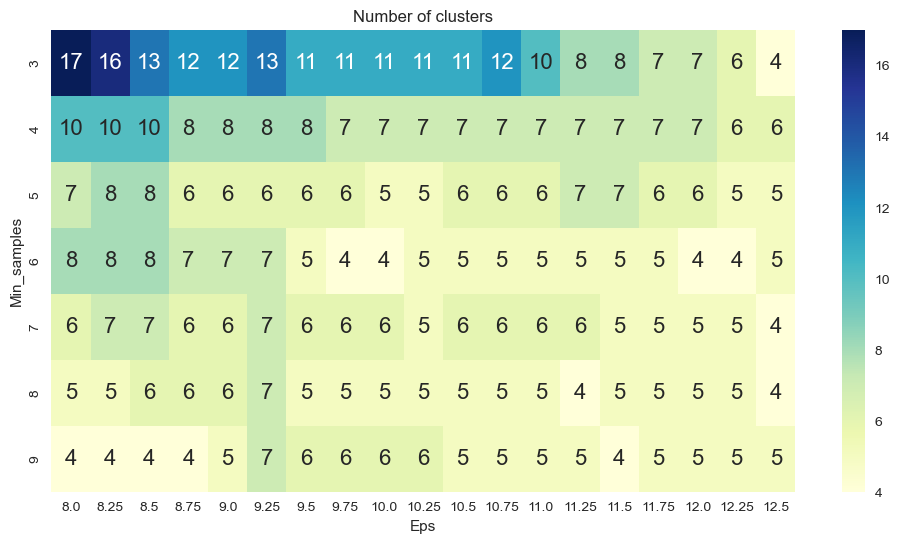

In [66]:
tmp = pd.DataFrame.from_records(DBSCAN_params, columns =['Eps', 'Min_samples'])   
tmp['No_of_clusters'] = no_of_clusters

pivot_1 = pd.pivot_table(tmp, values='No_of_clusters', index='Min_samples', columns='Eps')

fig, ax = plt.subplots(figsize=(12,6))
sns.heatmap(pivot_1, annot=True,annot_kws={"size": 16}, cmap="YlGnBu", ax=ax)
ax.set_title('Number of clusters')
plt.show()

The heatplot above shows, the number of clusters vary from 17 to 4. However, most of the combinations gives 4-7 clusters. To decide which combination to choose we will use a metric - a silhuette score and will plot it as a heatmap again.

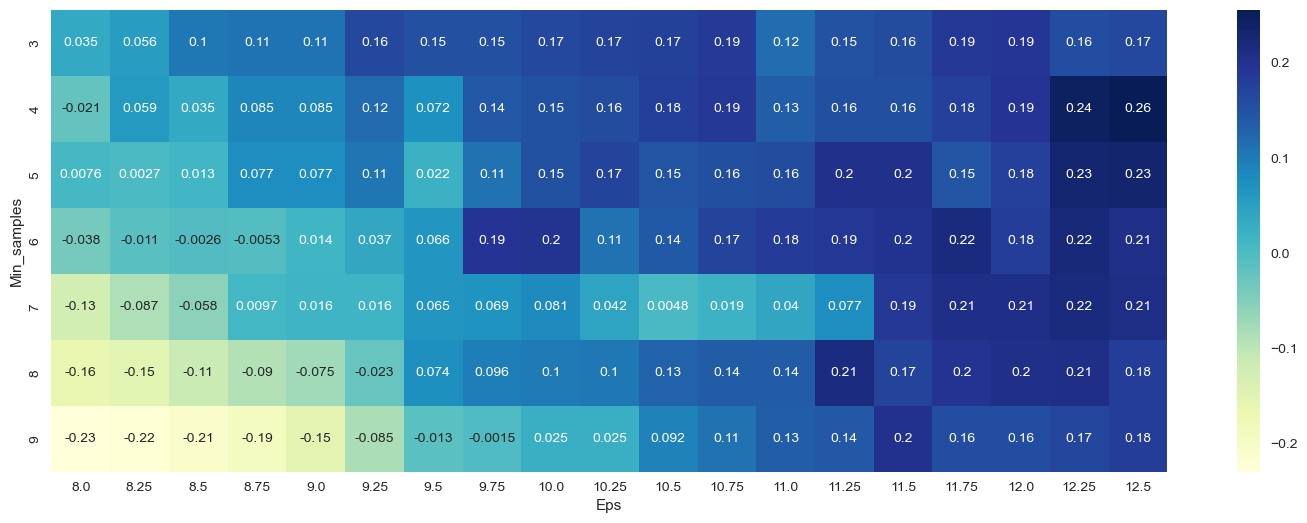

In [67]:
tmp = pd.DataFrame.from_records(DBSCAN_params, columns =['Eps', 'Min_samples'])   
tmp['Sil_score'] = sil_score

pivot_1 = pd.pivot_table(tmp, values='Sil_score', index='Min_samples', columns='Eps')

fig, ax = plt.subplots(figsize=(18,6))
sns.heatmap(pivot_1, annot=True, annot_kws={"size": 10}, cmap="YlGnBu", ax=ax)
plt.show()


Global maximum is 0.26 for eps=12.5 and min_samples=4.

In [68]:
DBS_clustering = DBSCAN(eps=12.5, min_samples=4).fit(X_numerics)

DBSCAN_clustered = X_numerics.copy()
DBSCAN_clustered.loc[:,'Cluster'] = DBS_clustering.labels_  # append labels to points

In [69]:
DBSCAN_clust_sizes = DBSCAN_clustered.groupby('Cluster').size().to_frame()
DBSCAN_clust_sizes.columns = ["DBSCAN_size"]
DBSCAN_clust_sizes

DBSCAN_size
Cluster             
-1                18
 0               112
 1                 8
 2                34
 3                24
 4                 4

DBSCAN created 5 clusters plus outliers cluster (-1). Sizes of clusters 0-4 vary significantly - some have only 4 or 8 observations. There are 18 outliers.

In [70]:
df4['Cluster_DBSCAN'] = DBS_clustering.labels_  # new variable showing to which cluster the observation belongs to
df4

Gender  Age  Annual Income (k$)  Spending Score (1-100)  \
CustomerID                                                            
1             Male   19                  15                      39   
2             Male   21                  15                      81   
3           Female   20                  16                       6   
4           Female   23                  16                      77   
5           Female   31                  17                      40   
...            ...  ...                 ...                     ...   
196         Female   35                 120                      79   
197         Female   45                 126                      28   
198           Male   32                 126                      74   
199           Male   32                 137                      18   
200           Male   30                 137                      83   

            Cluster_Hierarchical  Clusters_k-means  Cluster_DBSCAN  
CustomerID                                                          
1                              2                 2               0  
2                              5                 2               0  
3                              2                 2              -1  
4                              5                 2               0  
5                              2                 2               0  
...                          ...               ...             ...  
196                            4                 0              -1  
197                            1                 3              -1  
198                            4                 0              -1  
199                            1                 3              -1  
200                            4                 0              -1  

[200 rows x 7 columns]

In [71]:
df4['Cluster_DBSCAN'].value_counts()

Cluster_DBSCAN
 0    112
 2     34
 3     24
-1     18
 1      8
 4      4
Name: count, dtype: int64

In [72]:
df4.groupby('Cluster_DBSCAN')[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].mean(numeric_only=True)

Age  Annual Income (k$)  Spending Score (1-100)
Cluster_DBSCAN                                                       
-1              36.944444              74.000               44.944444
 0              39.142857              48.250               52.339286
 1              53.250000              27.750                9.500000
 2              32.882353              82.000               83.235294
 3              45.583333              85.875               17.958333
 4              20.750000              76.250                8.000000